---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    
    df = pd.read_csv('fraud_data.csv')
    
    fraudPerc = len(df[df['Class'] == 1])/len(df)
    
#    print('Percentage of fraud: %.4f%%' %fraudPerc)  
    
    return fraudPerc

answer_one()

Percentage of fraud: 0.0164%


0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # “most_frequent”: always predicts the most frequent label in the training set.
    model = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    rec = recall_score(y_test, y_pred)
    
#    print('Accuracy dummy classifier: ', acc)
#    print('Recall dummy classifier: ',   rec)
    
    return (acc, rec)

answer_two() 

Accuracy dummy classifier:  0.9852507374631269
Recall dummy classifier:  0.0


(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    model = SVC().fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    rec = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
#    print('Accuracy SVC classifier: ',  acc)
#    print('Recall SVC classifier: ',    rec)
#    print('Precision SVC classifier: ', pre)
    
    return (acc, rec, pre)

answer_three()  

Accuracy SVC classifier:  0.9907817109144543
Recall SVC classifier:  0.375
Precision SVC classifier:  1.0


(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    y_pred = SVC(C = 1e9, gamma= 1e-7).fit(X_train, y_train).decision_function(X_test) > -220

    matrix = confusion_matrix(y_test, y_pred) 
        
    return matrix

answer_four() 

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

Recall at the precision 0.75: 0.825
True positive rate where false positive rate is 0.16: 0.9375


<IPython.core.display.Javascript object>


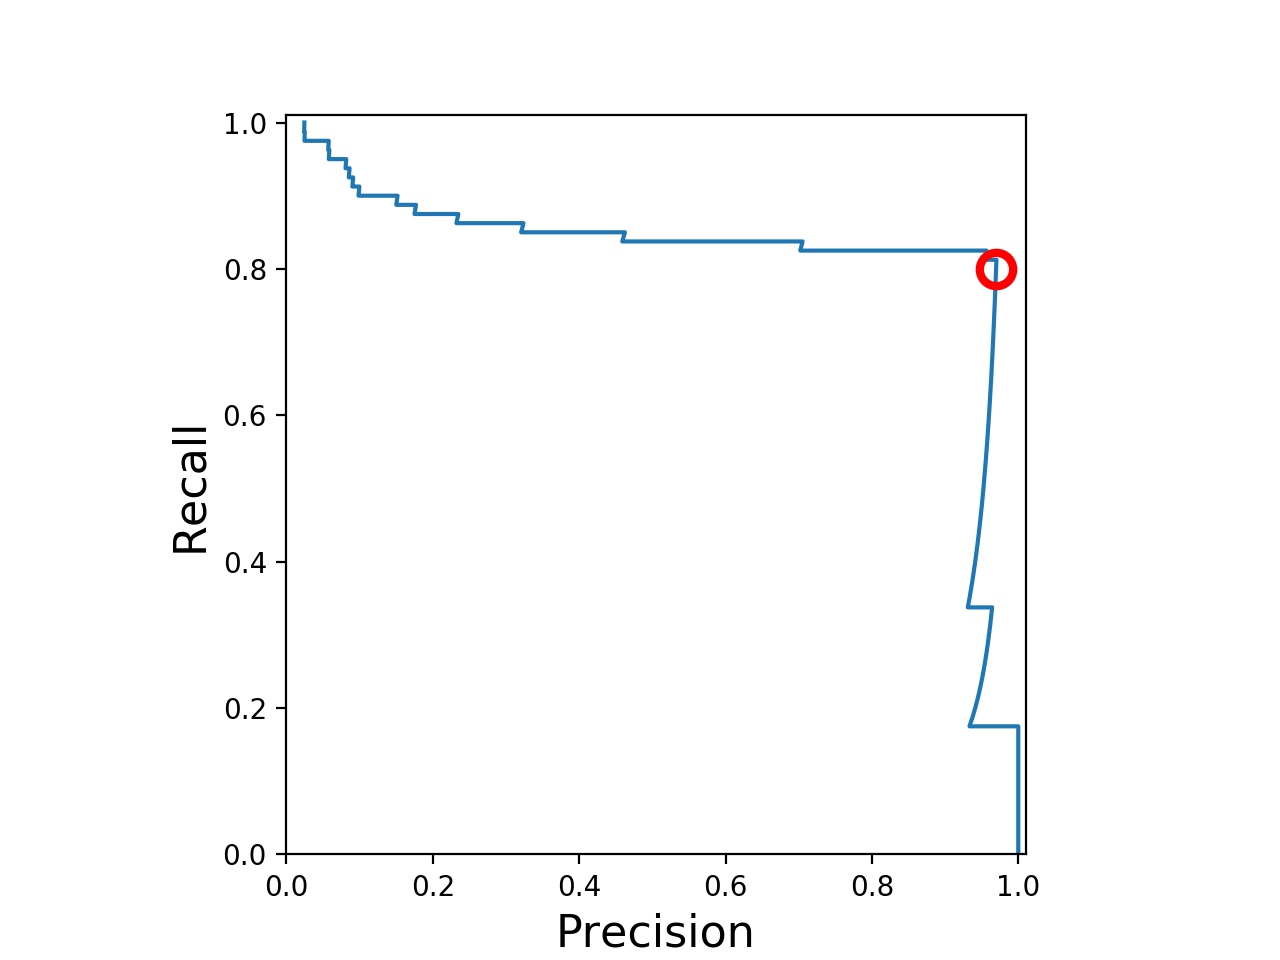

<IPython.core.display.Javascript object>


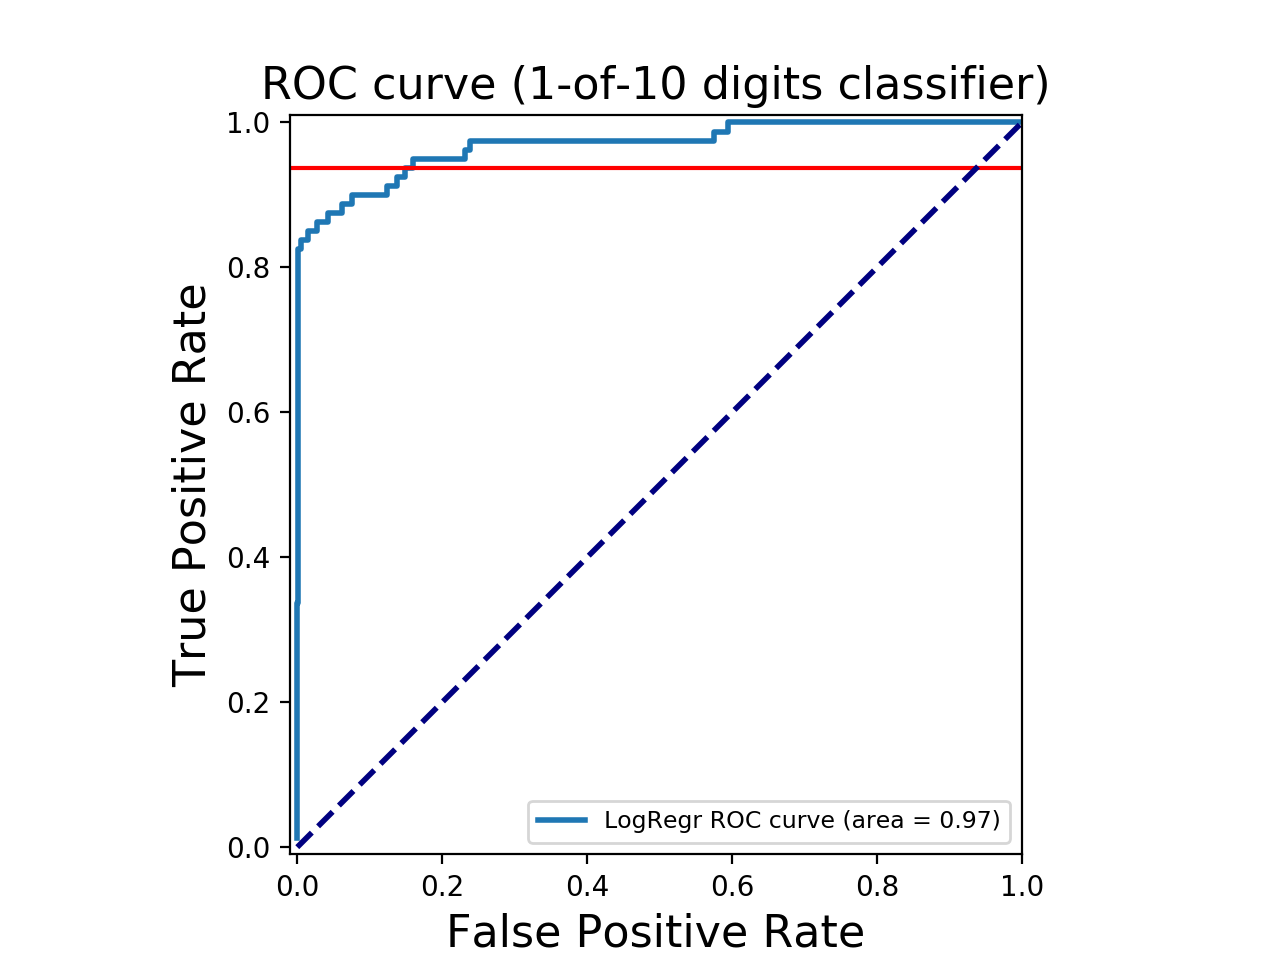

(0.825, 0.9375)

In [9]:
def answer_five():
    import numpy as np
#    import seaborn as sns
#    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
#    %matplotlib notebook
    
    model = LogisticRegression().fit(X_train, y_train)

    y_pred = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    index = np.where(precision == 0.75)[0][0]
    recall_at_precision = recall[index]  
#    print("Recall at the precision 0.75: {0}".format(recall_at_precision))

    y_pro = model.predict_proba(X_test)   
    rateFP, rateTP, _ = roc_curve(y_test, y_pro[:, 1])   
    AUC = auc(rateFP, rateTP)               
    index = np.where(np.round(rateFP, 2) == 0.16)[0][0]
#    print("True positive rate where false positive rate is 0.16: {0}".format(rateTP[index]))
    
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

#    plt.figure()
#    plt.xlim([0.0, 1.01])
#    plt.ylim([0.0, 1.01])
#    plt.plot(precision, recall, label='Precision-Recall Curve')
#    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
#    plt.xlabel('Precision', fontsize=16)
#    plt.ylabel('Recall', fontsize=16)
#    plt.gca().set_aspect('equal')
#    plt.show()

#    plt.figure()
#    plt.xlim([-0.01, 1.00])
#    plt.ylim([-0.01, 1.01])
#    plt.plot(rateFP, rateTP, lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(AUC))
#    plt.axhline(rateTP[index], color='r')
#    plt.xlabel('False Positive Rate', fontsize=16)
#    plt.ylabel('True Positive Rate', fontsize=16)
#    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
#    plt.legend(loc='lower right', fontsize=8.5)
#    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#    plt.gca().set_aspect('equal')
#    plt.show()
    
    return (recall_at_precision, rateTP[index])

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [10]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression()

    params = {'penalty': ['l1', 'l2'], 
              'C': [0.01, 0.1, 1, 10, 100]}

    grid = GridSearchCV(model, param_grid = params, scoring = 'recall', cv = 3)
    grid.fit(X_train, y_train)
            
    cv_results = grid.cv_results_
    mean = cv_results['mean_test_score'].reshape(5,2)
 
    return mean

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

<IPython.core.display.Javascript object>


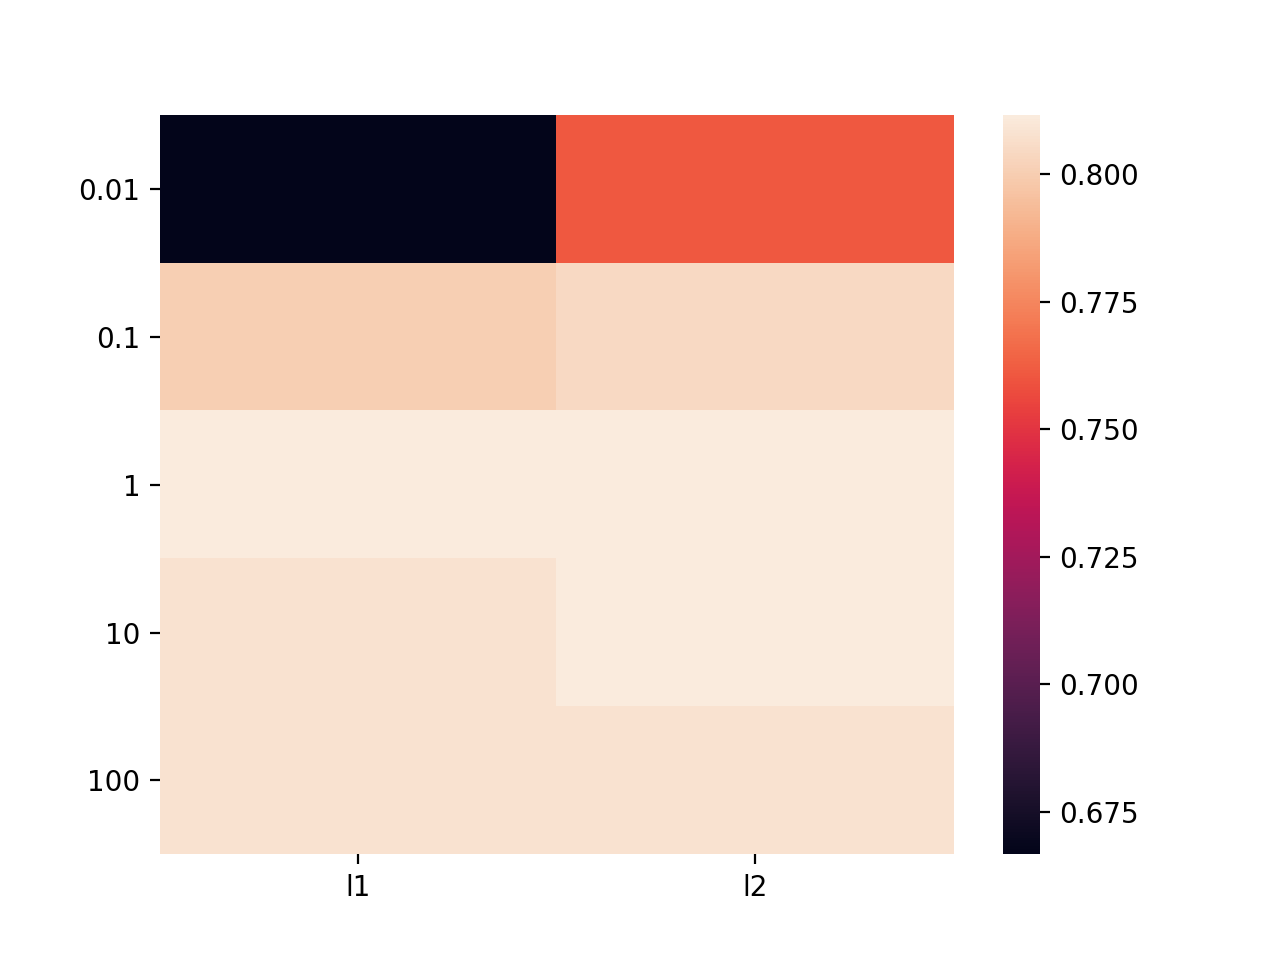

In [13]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
#    %matplotlib notebook
#    import seaborn as sns
#    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())